In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import feature_engine as fe
import seaborn as sns


In [ ]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 5.0 MB/s eta 0:00:00


In [ ]:
ins=pd.read_csv('/content/drive/MyDrive/Data Analysis/Insurance_data.csv')
ins.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [ ]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [ ]:
ins.isnull().sum()

,0
ID,0
Policy Start Date,0
Policy End Date,0
Gender,359
Age,0
First Transaction Date,0
No_Pol,0
Car_Category,3738
Subject_Car_Colour,6962
Subject_Car_Make,2476


In [ ]:
#Question 1 : What is the distribution of the target variable (classification outcome)?
targ_dist = ins['target'].value_counts()
print (f'The distribution class of target variable 0 and 1  is \n {targ_dist}')
targ_per = ins['target'].value_counts(normalize=True)*100

print (f' The percentage  of target variable 0 and 1 in the dataset is \n {targ_per}')

The distribution class of target variable 0 and 1  is 
 target
0    10624
1     1455
Name: count, dtype: int64
 The percentage  of target variable 0 and 1 in the dataset is 
 target
0    87.954301
1    12.045699
Name: proportion, dtype: float64


In [ ]:
# Question 2: Is there a significant relationship between Gender and the target variable? (Alternative 1- chi-square test approach )
from scipy. stats import chi2_contingency

Contingency_table = pd.crosstab(ins['Gender'], ins['target'])

chi2, P , _ , _ = chi2_contingency(Contingency_table)
print (f'The Chi Statistical Value is {chi2}')
print(f'The p value is {P}')

p_value = 0.05
if P  < p_value:
    print('Reject Null Hypothesis - there is a significant relationship between  Gender and target variable')
else:
    print('Accept Null Hypothesis - there is no significant relationship between Gender and target variable')

The Chi Statistical Value is 153.81657517268815
The p value is 1.2060462307666303e-30
Reject Null Hypothesis - there is a significant relationship between  Gender and target variable


In [ ]:
# Question 2: Is there a significant relationship between Gender and the target variable? (Alternative 2-  )
#handle missing values
from feature_engine.imputation import CategoricalImputer
ins['Gender'] = ins['Gender'].astype('category')

ca = CategoricalImputer(variables = ['Gender'],imputation_method = 'missing')

ins = ca.fit_transform(ins)


from feature_engine.encoding import OrdinalEncoder

oe = OrdinalEncoder(encoding_method='arbitrary', variables = ['Gender'])

ins = oe.fit_transform(ins)

In [ ]:
alt2 = ins['Gender'].corr (ins['target'])
print (f' The correlation between Gender and target variable is {alt2} indicating a positve correlation')

 The correlation between Gender and target variable is 0.007748916210633761 indicating a positve correlation


In [ ]:
#Question 3 : How does the Age of the customers correlate with the likelihood of positive or negative outcomes in the target variable?

age_targ = ins['Age'].corr (ins['target'])
print (f' {age_targ} a negative outcome-suggesting that as Age increases the possiblity of a positive outcome decreases and vice versa')

 -0.028936875229397547 a negative outcome-suggesting that as Age increases the possiblity of a positive outcome decreases and vice versa


In [ ]:
#Question 4 : What is the average No_Pol (number of policies) per customer?

avg_npol = ins['No_Pol'].mean()
print (f'The avergae number of policies per customer is : {avg_npol.round()}')

The avergae number of policies per customer is : 1.0


In [ ]:
#Question 5 .	Are there differences in policy outcomes (target) across different ProductName categories?

diff_pol = ins.groupby('ProductName')['target'].count()
diff_pol

,target
ProductName,
CVTP,469
Car Classic,6485
Car Plus,486
Car Vintage,5
CarFlex,176
CarSafe,3774
Customized Motor,545
Motor Cycle,46
Muuve,93


In [ ]:
# Question 6. What is the average duration between Policy Start Date and Policy End Date(Alternative 1)

policy_date_1 = np.datetime64('2010-05-14')
policy_date_2 = np.datetime64('2011-05-13')

difference = policy_date_2 - policy_date_1

print(f'Duration between date in days:',difference)

Duration between date in days: 364 days


In [ ]:
# Question 6. What is the average duration between Policy Start Date and Policy End Date(Alternative 2)
from datetime import datetime

date1 = datetime(2010, 5, 14)
date2 = datetime(2011, 5, 13)

duration = date2 - date1
days_between = duration.days
print(f'Duration between date in days:', days_between)

Duration between date in days: 364


In [ ]:
 #Question 7.Is there any seasonal trend in Policy Start Date (e.g., more policies starting during certain months)?
ins['Policy Start Date'] = pd.to_datetime(ins['Policy Start Date'])

ins['Year'] = ins['Policy Start Date'].dt.year
ins['Month'] = ins['Policy Start Date'].dt.month
ins['Month_Name'] = ins['Policy Start Date'].dt.month_name()

yearly_trend = ins.groupby('Year')['No_Pol'].count()
print(yearly_trend)

ins['Policy Start Date'] = pd.to_datetime(ins['Policy Start Date'])

ins['Year'] = ins['Policy Start Date'].dt.year
ins['Month'] = ins['Policy Start Date'].dt.month
ins['Month_Name'] = ins['Policy Start Date'].dt.month_name()

Monthly_trend = ins.groupby('Month_Name')['No_Pol'].count()
print(Monthly_trend)

Year
2001        1
2002        1
2003        2
2005        1
2006        2
2007        1
2009        6
2010    12065
Name: No_Pol, dtype: int64
Month_Name
April        1108
August        967
December      971
February      996
January      1168
July         1130
June          785
March        1080
May           918
November     1001
October      1016
September     939
Name: No_Pol, dtype: int64


In [ ]:
#Question 8 : Does the Car_Category affect the outcome of the target variable? (Alternative 1 - Encoding / Coorelation)
from feature_engine.imputation import CategoricalImputer

ins['Car_Category'] = ins['Car_Category'].astype('category')

ca = CategoricalImputer(variables = ['Car_Category'],imputation_method = 'missing')

ins = ca.fit_transform(ins)


from feature_engine.encoding import OrdinalEncoder

oe = OrdinalEncoder(encoding_method= 'arbitrary', variables = ['Car_Category'])

ins = oe.fit_transform(ins)


In [ ]:
from scipy.stats import pearsonr

coorelation, p_value = pearsonr(ins['Car_Category'], ins['target'])
print(coorelation)
print(p_value)

-0.010734596995091331
0.23812255845599287


In [ ]:
#Question 9.	How does Car_Make (e.g., TOYOTA, etc.) impact policy outcomes?
q9 = ins['Car_Category'].corr(ins['target'])
q9

-0.010734596995091385

In [ ]:
from scipy.stats import chi2_contingency #This approach provide a meaningful result that insight can be drawn from (Alternative 2)

contingency_table = pd.crosstab(ins['Car_Category'], ins['target'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-Square Test p-value:", p_value)

p = 0.05
if p_value  < p:
    print('Reject Null Hypothesis - This suggests that Car_Category has a significant effect on the target variable.\n Certain car categories are likely associated with different outcomes in the target variable.')
else:
    print('Accept Null Hypothesis - there is no significant relationship between Gender and target variable')

Chi-Square Test p-value: 2.530911423289555e-13
Reject Null Hypothesis - This suggests that Car_Category has a significant effect on the target variable.
 Certain car categories are likely associated with different outcomes in the target variable.


In [ ]:
#Question 9.	How does Car_Make (e.g., TOYOTA, etc.) impact policy outcomes?

from scipy.stats import chi2_contingency

Contingency_Table = pd.crosstab(ins['Subject_Car_Make'], ins['No_Pol'])

chi2, p, _, _ = chi2_contingency(Contingency_Table)
print("Chi-Square Test p-value:", p)

alpha = 0.05
if p  < alpha:
    print('Reject Null Hypothesis - This suggests that theres a significant relationship between Car Make and Policy Outcome - \n meaning the make of the cars effect the  outcome of policy.')
else:
    print('Accept Null Hypothesis - there is no significant relationship between Car Make and Policy Outcome')

Chi-Square Test p-value: 2.216526940508275e-194
Reject Null Hypothesis - This suggests that theres a significant relationship between Car Make and Policy Outcome - 
 meaning the make of the cars effect the  outcome of policy.


In [ ]:
#Question 10. Are certain car colors (Subject_Car_Colour) more prone to negative outcomes (i.e., target = 1)?
from scipy.stats import chi2_contingency

Contingency_Table = pd.crosstab(ins['Subject_Car_Colour'], ins['target']== 1)

chi2, p, _, _ = chi2_contingency(Contingency_Table)
print("Chi-Square Test p-value:", p)

alpha = 0.05
if p  < alpha:
    print('Reject Null Hypothesis meaning there are evidences that Certain Car Colours are prone to  negative outcome')
else:
    print('Accept Null Hypothesis meaning there is no evidence if Car Colour are prone to  negative outcome')

Chi-Square Test p-value: 9.503759734456935e-07
Reject Null Hypothesis meaning there are evidences that Certain Car Colours are prone to  negative outcome


In [ ]:
#Question 11:	How does the No_Pol (number of policies) correlate with the customer’s age?
pol_age_corr = ins['No_Pol'].corr(ins['Age'])
print(f'The correlation between No_Pol and Age is {pol_age_corr:.4f}')
print("This indicate that the number of policies increase or decreases with Customer's Age")

The correlation between No_Pol and Age is 0.0162
This indicate that the number of policies increase or decreases with Customer's Age


In [ ]:
#Question 12: Does LGA_Name (location) or State influence the target variable?

from feature_engine.imputation import CategoricalImputer

ins['State'] = ins['State'].astype('category')

ca = CategoricalImputer(variables= ['State'], imputation_method='missing')
ins = ca.fit_transform(ins)

from feature_engine.encoding import  OrdinalEncoder
oe = OrdinalEncoder(encoding_method= 'arbitrary', variables= ['State'])
ins = oe.fit_transform(ins)

In [ ]:
inf_sta_targ = ins['State']. corr (ins['target'])
print(f'{inf_sta_targ:.4f} indicate that State influences target variable')

0.0042 indicate that State influences target variable


In [ ]:
#Question 13.	What is the gender distribution in the dataset, and how does it relate to policy outcomes?
gen_dis = ins['Gender'].value_counts()
print(gen_dis)
gen_per = ins['Gender'].value_counts(normalize = True)*100
print(f'{gen_per.round()}')

Gender
Male            7617
Female          3327
Entity           277
Joint Gender     223
NOT STATED       175
NO GENDER         66
SEX               35
Name: count, dtype: int64
Gender
Male            65.0
Female          28.0
Entity           2.0
Joint Gender     2.0
NOT STATED       1.0
NO GENDER        1.0
SEX              0.0
Name: proportion, dtype: float64


In [ ]:
#14. How many unique car categories are present in the dataset, and what is their distribution?

In [ ]:

ins['Car_Category'].value_counts()

,count
Car_Category,
Saloon,6034
JEEP,2021
Truck,97
Bus,54
Mini Bus,36
Pick Up,30
Motorcycle,17
Mini Van,13
Sedan,12


In [ ]:
#16.Are there any notable differences in policy outcomes between Car Classic, CarSafe, and Muuve?
car_classic_data = ins[ins['ProductName'] == 'Car Classic']
car_classic_policy_counts = car_classic_data['No_Pol'].value_counts()
print('car classic policy counts')
print(car_classic_policy_counts)

car_Safe_data = ins[ins['ProductName'] == 'CarSafe']
car_Safe_policy_counts = car_Safe_data['No_Pol'].value_counts()
print('car Safe policy counts')
print(car_Safe_policy_counts)

muuve_data = ins[ins['ProductName'] == 'Muuve']
muuve_policy_counts = muuve_data['No_Pol'].value_counts()
print('muuve policy counts')
print(muuve_policy_counts)


car classic policy counts
No_Pol
1    5007
2    1084
3     302
4      67
5      18
6       7
Name: count, dtype: int64
car Safe policy counts
No_Pol
1     3533
2      192
3       26
7       11
4       10
10       2
Name: count, dtype: int64
muuve policy counts
No_Pol
4     53
3     33
2      3
1      3
10     1
Name: count, dtype: int64


In [ ]:
#17.	What percentage of the policies were for Saloon cars compared to other categories?

Saloon_cars = ins[ins['Car_Category']== 'Saloon']
per_pol_salon = len(Saloon_cars) / len(ins) * 100


print(per_pol_salon)

49.95446642934018


In [ ]:
ins['No_Pol'].unique()

array([ 1,  3,  2,  4,  5,  7, 10,  6])

In [ ]:
len(Saloon_cars)

6034

In [ ]:
#19	Are customers with multiple policies (No_Pol > 1) more likely to have certain outcomes?
filtered_pol = ins[ins['No_Pol']> 1]
q19 = filtered_pol['No_Pol'].corr(ins['target'])
q19



0.059379843870406526

In [ ]:
#20.	Are there any missing values in the dataset, and if so, how are they distributed across columns?
ins.isnull().sum()

,0
ID,0
Policy Start Date,0
Policy End Date,0
Gender,359
Age,0
First Transaction Date,0
No_Pol,0
Car_Category,3738
Subject_Car_Colour,6962
Subject_Car_Make,2476


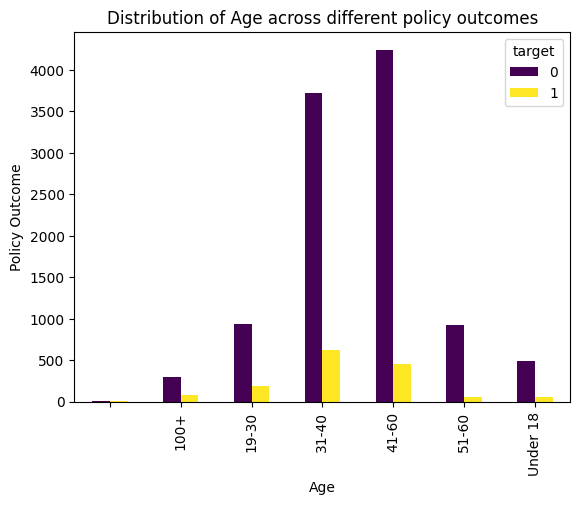

In [ ]:
#DATA VISUALIZATION 1.	Can we visualize the distribution of Age across different policy outcomes?
Age_targ = ins.groupby('age_group')['target'].value_counts().unstack()
Age_targ.plot(kind='bar', colormap="viridis")
plt.title('Distribution of Age across different policy outcomes')
plt.xlabel('Age')
plt.ylabel('Policy Outcome')
plt.show()

In [ ]:
Age_targ = ins.groupby('age_group')['target'].value_counts().unstack()
Age_targ

target,0,1
age_group,,
,12,3
100+,298,77
19-30,933,188
31-40,3724,619
41-60,4245,449
51-60,922,60
Under 18,490,59


In [ ]:
negative_age = ins[ins['Age'] < 0]

ins['Age'] = ins['Age'].apply(lambda x: np.nan if x < 0 else x)

In [ ]:
def age_group(age):
    if 0<= age <= 18:
        return 'Under 18'
    elif 19 <= age <= 30:
        return '19-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 60:
        return '41-60'
    elif 61 <= age <= 100:
        return '51-60'
    elif age > 100:
        return '100+'
    else:
        return ""
ins['age_group'] = ins['Age'].apply(age_group)

In [ ]:
ins_cleaned = ins.dropna(subset=['Age'])
ins_cleaned

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,age_group
0,ID_0040R73,2010-05-14,2011-05-13,Male,30.0,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0,19-30
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79.0,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1,51-60
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43.0,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0,41-60
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2.0,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0,Under 18
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20.0,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1,19-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30.0,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1,19-30
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59.0,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0,41-60
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34.0,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0,31-40
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,NaN,120.0,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0,100+


In [ ]:
ins['Age'].unique()

array([ 30.,  79.,  43.,   2.,  20.,  37.,  40.,  71.,  58.,  45.,  51.,
       120.,  38.,  81.,  69.,  31.,  70.,  34.,   1.,  41.,  47.,  36.,
        46.,  48.,  39.,  63.,  42.,  27.,  64.,  50.,  53.,  33.,  23.,
        32.,  59.,  60.,  52.,  54.,  44.,  11.,  78.,  28.,  29.,  57.,
        12.,  65.,  35.,  73.,  56.,  55.,  26.,  49.,  18.,  14.,  62.,
        25.,  61.,  72.,  82.,  67.,   7.,  10.,  68.,  21.,  76.,  24.,
        66.,   3.,  93.,  22.,  77.,  19.,  80.,   9.,   6.,  nan,  89.,
        74.,  75.,  84.,  16.,  90., 140.,   8.,   5.,  13.,  86.,  15.,
       320.,  83.,  85.,   4., 144., 112.,  17.,   0.,  88.,  87., 133.,
       102., 128., 100.])

In [ ]:
ins.groupby('age_group')['target'].value_counts()

age_group  target
           0           12
           1            3
100+       0          298
           1           77
19-30      0          933
           1          188
31-40      0         3724
           1          619
41-60      0         4245
           1          449
51-60      0          922
           1           60
Under 18   0          490
           1           59
Name: count, dtype: int64

In [ ]:
#2.	How does the count of different car categories (Car_Category) break down by policy outcome?
category_outcome = ins.groupby('Car_Category')['target'].count()


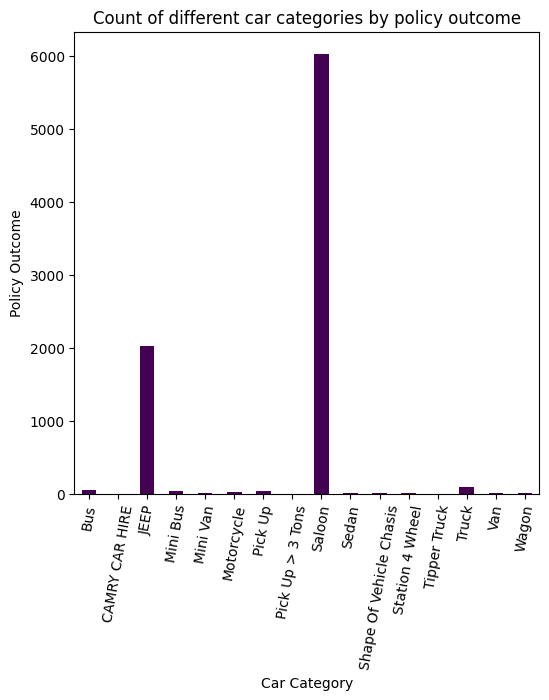

In [ ]:
plt.figure(figsize=(6,6))
category_outcome.plot(kind = 'bar', colormap ='viridis')
plt.title('Count of different car categories by policy outcome')
plt.ylabel('Policy Outcome')
plt.xlabel('Car Category')
plt.xticks(rotation= 80)
plt.show()


In [ ]:
ins.groupby('Car_Category')['target'].count()

,target
Car_Category,
Bus,54
CAMRY CAR HIRE,1
JEEP,2021
Mini Bus,36
Mini Van,13
Motorcycle,17
Pick Up,30
Pick Up > 3 Tons,1
Saloon,6034


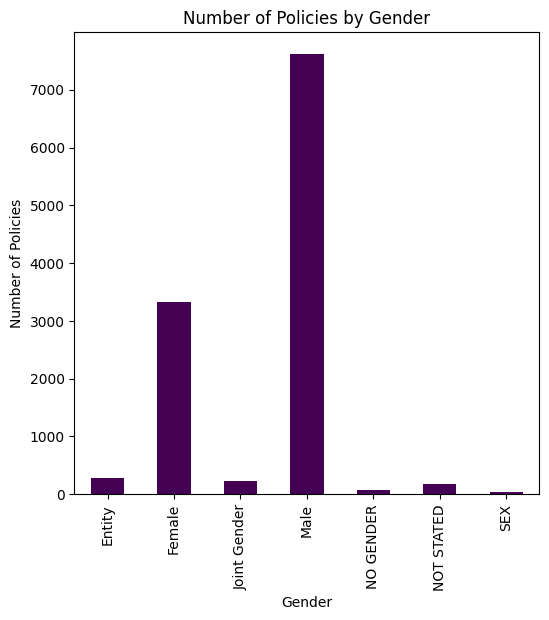

In [ ]:
#3.	Can we visualize the number of policies (No_Pol) by Gender?
plt.figure(figsize=(6,6))
No_pol_Gender = ins.groupby('Gender')['No_Pol'].count()
No_pol_Gender.plot(kind='bar', colormap="viridis")
plt.title('Number of Policies by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Policies')

plt.show()

In [ ]:
ins.groupby('Gender')['No_Pol'].count()

,No_Pol
Gender,
Entity,277
Female,3327
Joint Gender,223
Male,7617
NO GENDER,66
NOT STATED,175
SEX,35


In [ ]:
ins.columns


Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'age_group', 'Year', 'Month', 'Month_Name'],
      dtype='object')

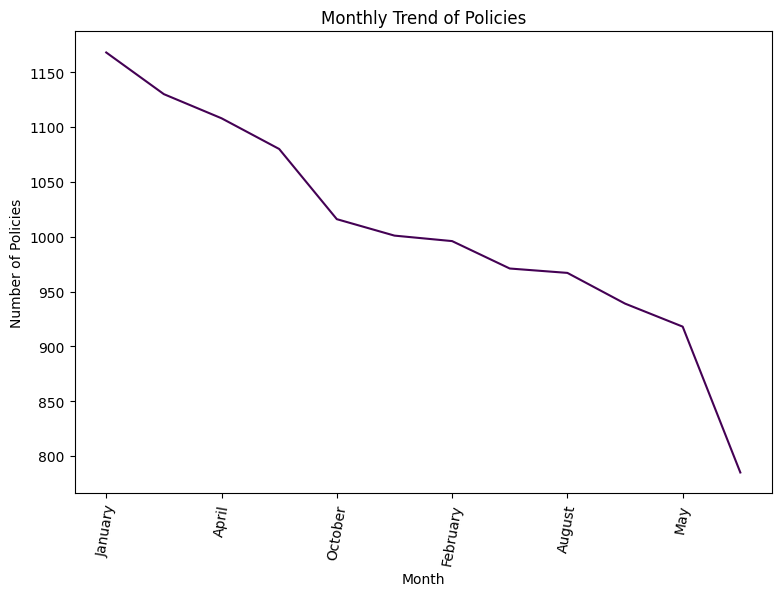

In [ ]:
plt.figure(figsize=(9,6))
Monthly_trend = ins.groupby('Month_Name')['No_Pol'].count().sort_values(ascending=False)
Monthly_trend.plot(kind='line', colormap="viridis")
plt.title('Monthly Trend of Policies')
plt.xlabel('Month')
plt.ylabel('Number of Policies')
plt.xticks(rotation=80)
plt.show()

In [ ]:
Monthly_trend

,No_Pol
Month_Name,
January,1168
July,1130
April,1108
March,1080
October,1016
November,1001
February,996
December,971
August,967


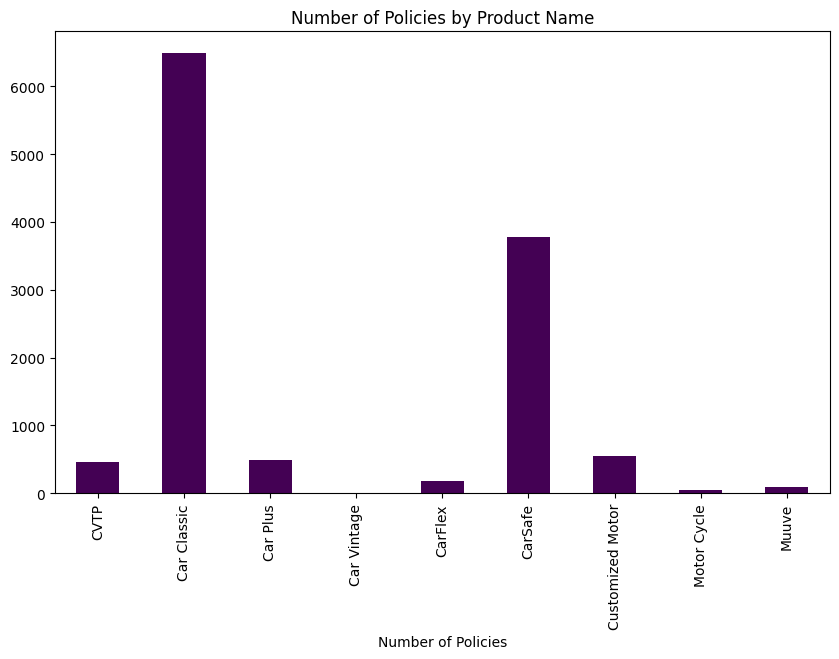

In [ ]:
#5.	Can we create a bar chart showing the number of policies by ProductName?
plt.figure(figsize=(10,6))
no_pol_gender = ins.groupby('ProductName')['No_Pol'].count()
no_pol_gender.plot(kind='bar', colormap="viridis")
plt.title('Number of Policies by Product Name')
plt.xlabel('Number of Policies')
plt.show()

In [ ]:
ins.groupby('ProductName')['No_Pol'].sum()

,No_Pol
ProductName,
CVTP,848
Car Classic,8481
Car Plus,695
Car Vintage,10
CarFlex,192
CarSafe,4132
Customized Motor,1016
Motor Cycle,86
Muuve,330


<Figure size 640x480 with 0 Axes>

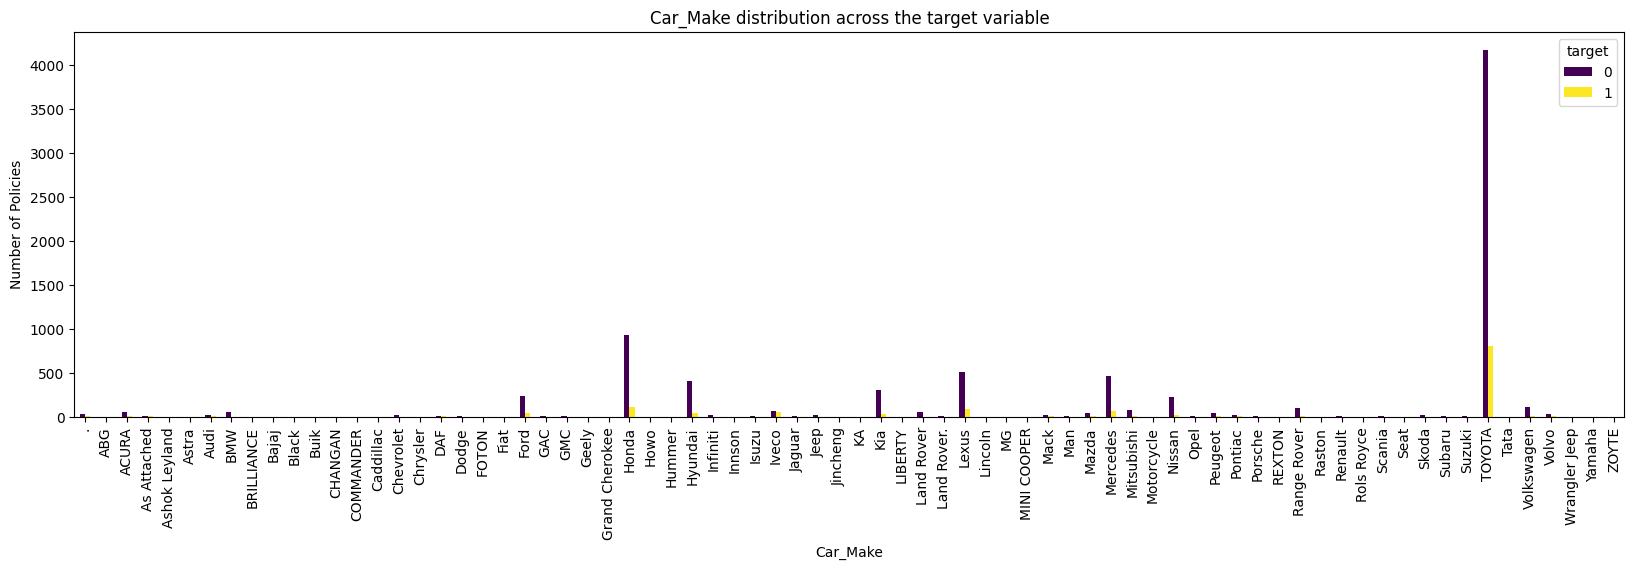

In [ ]:
#6.How does Car_Make distribution vary across the target variable?
plt.figure()
Car_targ = ins.groupby('Subject_Car_Make')['target'].value_counts().unstack()
Car_targ.plot(kind = 'bar', colormap="viridis")
plt.title('Car_Make distribution across the target variable')
plt.xlabel('Car_Make')
plt.ylabel('Number of Policies')
plt.gcf().set_size_inches(20, 5)
plt.show()

In [ ]:
ins['Subject_Car_Make'].unique()

array(['TOYOTA', nan, 'REXTON', 'Lexus', 'Hyundai', 'Iveco', 'DAF',
       'Honda', 'Mercedes', 'Jincheng', 'ACURA', 'Ford', 'Volkswagen',
       'Nissan', '.', 'Pontiac', 'Range Rover', 'Kia', 'Mitsubishi',
       'Scania', 'BMW', 'Infiniti', 'Renault', 'Volvo', 'Hummer', 'Mack',
       'Grand Cherokee', 'Porsche', 'Peugeot', 'Land Rover', 'Chevrolet',
       'Mazda', 'Man', 'Jeep', 'Audi', 'Suzuki', 'MINI COOPER', 'KA',
       'As Attached', 'Innson', 'Isuzu', 'Skoda', 'Jaguar', 'Chrysler',
       'Dodge', 'GMC', 'Land Rover.', 'Subaru', 'GAC', 'Fiat', 'Opel',
       'Astra', 'Motorcycle', 'ZOYTE', 'Seat', 'FOTON', 'Howo', 'Lincoln',
       'Rols Royce', 'CHANGAN', 'LIBERTY', 'ABG', 'Yamaha', 'Black',
       'Tata', 'Ashok Leyland', 'Geely', 'Caddillac', 'Wrangler Jeep',
       'Raston', 'MG', 'BRILLIANCE', 'Buik', 'COMMANDER', 'Bajaj'],
      dtype=object)

In [ ]:
at = ins.groupby('Subject_Car_Make')['target'].value_counts()
at

Subject_Car_Make  target
.                 0         30
                  1         14
ABG               0          1
ACURA             0         58
                  1          7
                            ..
Volvo             0         29
                  1          8
Wrangler Jeep     0          2
Yamaha            0          1
ZOYTE             0          1
Name: count, Length: 106, dtype: int64

In [ ]:
ins['State'].unique()

array([nan, 'Lagos', 'Benue', 'Eti-Osa', 'Delta', 'Ogun',
       'Abuja-Municipal', 'Oshodi-Isolo', 'Ibeju-Lekki', 'Ibadan-West',
       'Obia-Akpor', 'Ibadan-East', 'Kaduna-South', 'Amuwo-Odofin',
       'Anambra', 'Rivers', 'Niger-State', 'Edo', 'Akwa-Ibom',
       'ENUGU-EAST', 'Abuja', 'Kaduna', 'Esan-West', 'Obafemi-Owode',
       'Orile-Iganmu', 'Ifako-Ijaye', 'Ibadan-North', 'Imo', 'Jos-North',
       'Ondo-West', 'Kaduna-North', 'Aniocha-South', 'Awka-South',
       'Ile-Oluji', 'Ijebu-Ode', 'Port-Harcourt', 'Nnewi-North',
       'Aboh-Mbaise', 'Oyo', 'Akoko-West', 'Warri-Central', 'Cross-River',
       'Jos-South', 'Onitsha-North', 'Osun', 'Ajeromi-Ifelodun',
       'Kano-Municipal', 'Ife-Central', 'Ilorin-West', 'Lagelu-North',
       'Owerri-Municipal', 'Nsit-Ubium', 'Udi-Agwu', 'Essien-Udim',
       'Owerri-West', 'Ondo', 'Ogbmosho-South', 'Umuahia-South',
       'ABULE-EGBA', 'Enugu-North', 'Ovia-SouthWest', 'Kebbi',
       'Ajegunle-State', 'Ekiti-West', 'Ogun-Waterside',

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

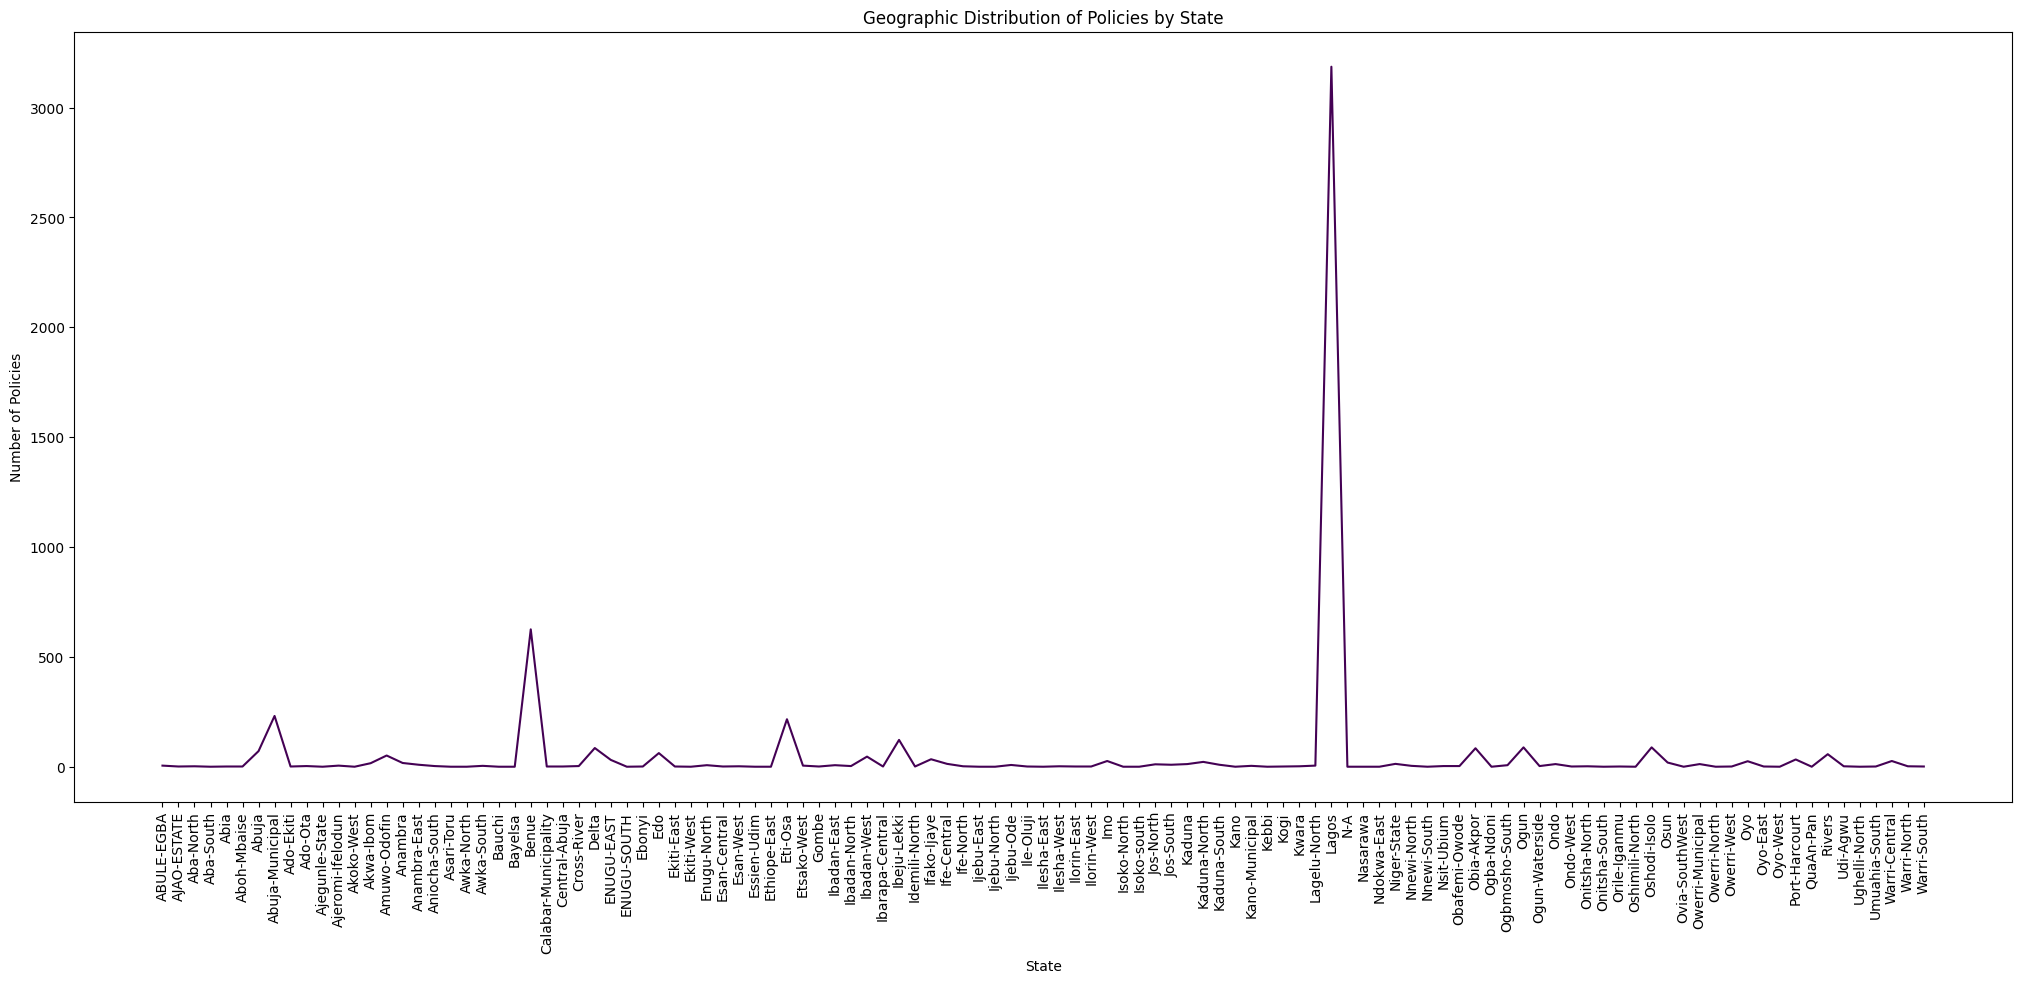

In [ ]:
#7.	Can we visualize the geographic distribution of policies by State?
state_pol = ins.groupby('State')['No_Pol'].count()
plt.figure(figsize=(25,10))
state_pol.plot(kind='line', colormap="viridis")
plt.title('Geographic Distribution of Policies by State')
plt.xlabel('State')
plt.ylabel('Number of Policies')
plt.xticks(ticks=range(len(state_pol.index)), labels=state_pol.index,rotation=90)
plt

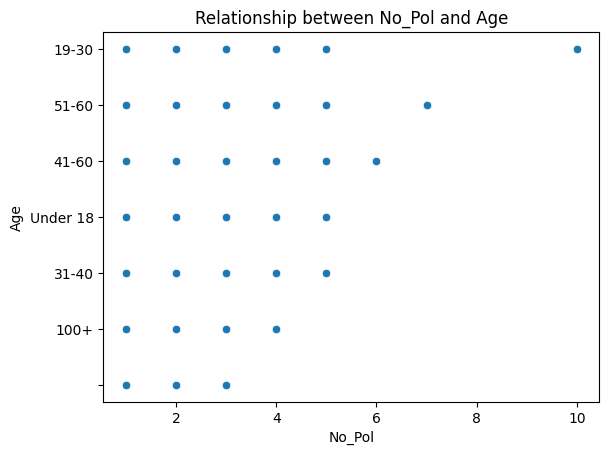

In [ ]:
#8.	What is the relationship between No_Pol and Age in a scatter plot?
sns.scatterplot(x='No_Pol', y = 'age_group', data = ins)
plt.title('Relationship between No_Pol and Age')
plt.xlabel('No_Pol')
plt.ylabel('Age')
plt.show()